In [1]:
import pandas as pd
import numpy as np
import regex as re

import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("fiqa-pl.parquet")
df.head()

,_id,title,text
0,3,,"Nie mówię, że nie podoba mi się też pomysł szk..."
1,31,,Tak więc nic nie zapobiega fałszywym ocenom po...
2,56,,Nigdy nie możesz korzystać z FSA dla indywidua...
3,59,,Samsung stworzył LCD i inne technologie płaski...
4,63,,Oto wymagania SEC: Federalne przepisy dotycząc...


1. Devise two regular expressions:
 - extracting times, e.g. recognizing 20:30 as an instance of a time.
 - extracting dates, e.g. recognizing 20 września as an instance of a date.

In [3]:
time_pattern = r'\b(?:[01]?\d|2[0-3]):[0-5]\d\b'
date_pattern = r'\b\d{1,2}\s+' \
             + r'(?:stycznia|lutego|marca|kwietnia|maja|czerwca|lipca|sierpnia|września|października|listopada|grudnia)' \
             + r'\b'

2. Search for occurrences of times and dates in the dataset.

In [4]:
times = df['text'].apply(lambda text: re.findall(time_pattern, text, re.IGNORECASE))
times = [match for sublist in times for match in sublist]

dates = df['text'].apply(lambda text: re.findall(date_pattern, text, re.IGNORECASE))
dates = [match for sublist in dates for match in sublist]

3 . Plot results from point 2:
 - for times create a bar plot for full hours (i.e. 17:35 -> is 17).
 - for dates create a bar plot for months.

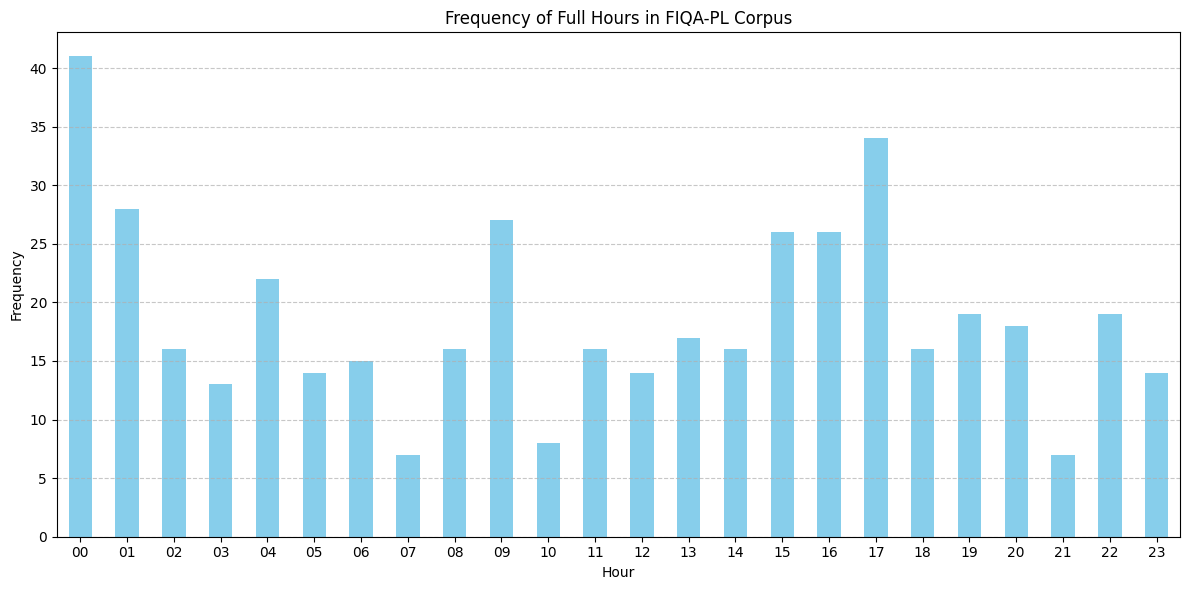

In [5]:
hours = [time.split(':')[0].zfill(2) for time in times]
hour_freqs = pd.Series(hours).value_counts().sort_index()

plt.figure(figsize=(12, 6))
hour_freqs.plot(kind='bar', color='skyblue')
plt.title('Frequency of Full Hours in FIQA-PL Corpus')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

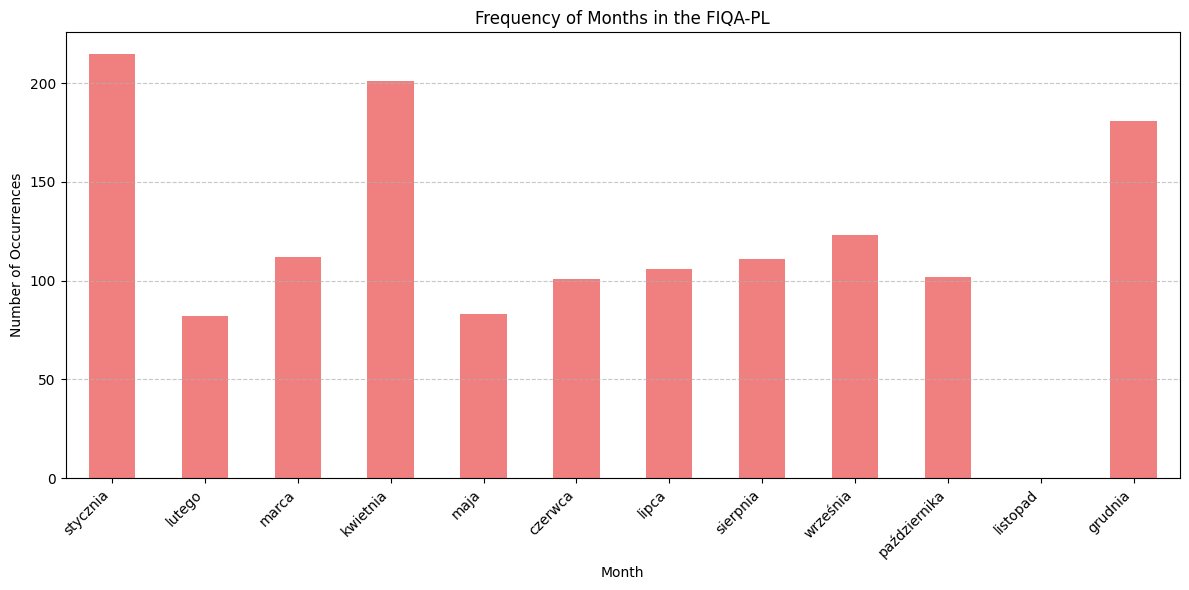

In [6]:
months = pd.Series([date.split()[-1].lower() for date in dates])
month_freqs = months.value_counts()
order = ['stycznia', 'lutego', 'marca', 'kwietnia',
         'maja', 'czerwca','lipca', 'sierpnia', 'września',
         'października', 'listopad', 'grudnia']
month_freqs = month_freqs.reindex(order, fill_value=0)

plt.figure(figsize=(12, 6))
month_freqs.plot(kind='bar', color='lightcoral')
plt.title('Frequency of Months in the FIQA-PL')
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

4. Compute the number of occurrences of `kwiecień` word in any inflectional form. Use a compact form for the query. The only forbidden form is a juxtaposition of the month names, i.e. `"kwiecień|kwietnia|kwietniu..."`.

In [18]:
pattern_1 = r'\bkwiecień|kwiet\p{L}+\b'
matches = df['text'].apply(lambda text: re.findall(pattern_1, text, re.IGNORECASE))
matches = [match for sublist in matches for match in sublist]
print(f"Number of matches: {len(matches)}")
print(f"Unique variants of \'kwiecień\': {set(matches)}")

Number of matches: 362
Unique variants of 'kwiecień': {'kwietniowej', 'kwiecień', 'kwietniu', 'KWIETNIA', 'kwietniowym', 'Kwiecień', 'kwietniowych', 'kwietniem', 'kwietniową', 'kwietnia', 'kwietniowy'}


5. As in 4, but preceded by a number and a space.


In [22]:
pattern_2 = r'\b\d+\s+(?:kwiecień|kwiet\p{L}+)\b'
matches = df['text'].apply(lambda text: re.findall(pattern_2, text, re.IGNORECASE))
matches = [match for sublist in matches for match in sublist]
print(f"Number of matches: {len(matches)}")
print(f"Example: \'{matches[0]}\'")

Number of matches: 201
Example: '2 kwietnia'


6. As in 4, but not preceded by a number and a space. Check if the results from 5 and 6 sum to 4.


In [24]:
pattern_3 = r'(?<!\d\s+)(?:kwiecień|kwiet\p{L}+)\b'
matches = df['text'].apply(lambda text: re.findall(pattern_3, text, re.IGNORECASE))
matches = [match for sublist in matches for match in sublist]
print(f"Number of matches: {len(matches)}")
print(f"Example: \'{matches[0]}\'")

Number of matches: 161
Example: 'kwietniu'


7. Ask an LLM (e.g. [Bielik](https://chat.bielik.ai/)) to complete these tasks for you. Compare and criticize the code generated by the LLM.


Answer the following questions (2 points):
1. Are regular expressions good at capturing times?
2. Are regular expressions good at capturing dates?
3. How one can be sure that the expression has matched all and only the correct expressions of a given type?
4. Is LLM able to generate regular expressions?